# Task 1: Investigate and analyze price data

--------

## Content

- How to extrapolate data from external feeds to provide granular insights
- Code that analyzes data to take a date as input and return a price for past and future estimates

----------

In [3]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\dishy\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [4]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [5]:
# Cargar los datos desde el archivo CSV
file_path = 'C:/Users/dishy/OneDrive/Documents/GitHub/JPMorgan-Chase-Quantitative-Research-job-simulation/TASK 1/Nat_Gas.csv'  # Asegúrate de cambiar la ruta al archivo correcto
nat_gas_data = pd.read_csv(file_path)

In [7]:
nat_gas_data.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [8]:
nat_gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes


In [9]:
# Ya que Dates se encuentra como tipo de dato object considerado como una columna generica, debemos convertir la columna 'Dates' a formato datetime 
# para poder realizar operaciones
nat_gas_data['Dates'] = pd.to_datetime(nat_gas_data['Dates'], format='%m/%d/%y')

In [10]:
nat_gas_data.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


In [11]:
# Crear una nueva columna numérica para representar las fechas
nat_gas_data['Date_Num'] = (nat_gas_data['Dates'] - nat_gas_data['Dates'].min()).dt.days

In [12]:
nat_gas_data.head()

,Dates,Prices,Date_Num
0,2020-10-31,10.1,0
1,2020-11-30,10.3,30
2,2020-12-31,11.0,61
3,2021-01-31,10.9,92
4,2021-02-28,10.9,120


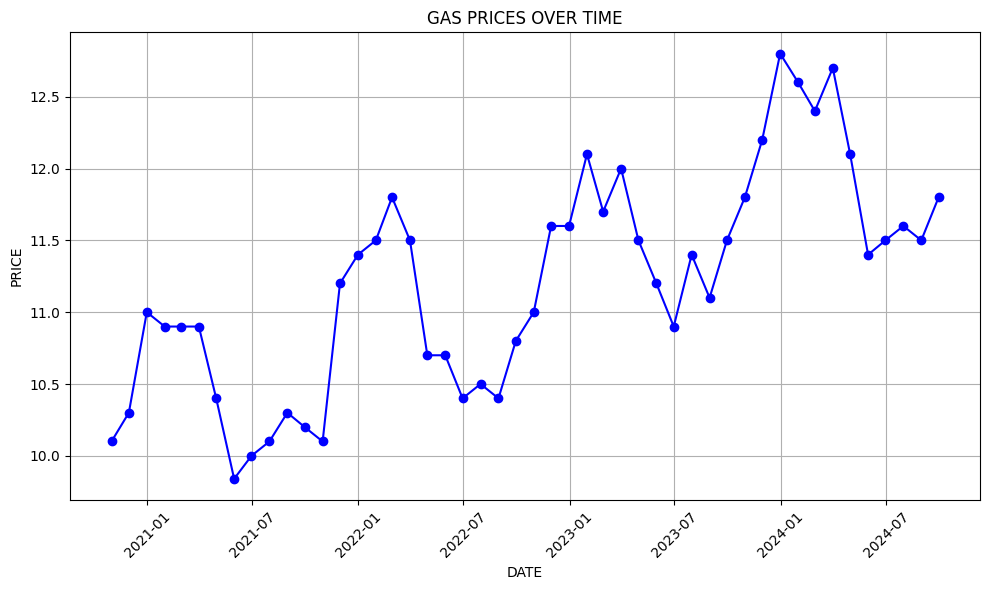

In [16]:
# Visualizar los datos de precios del gas natural
plt.figure(figsize=(10, 6))
plt.plot(nat_gas_data['Dates'], nat_gas_data['Prices'], marker='o', linestyle='-', color='b')
plt.title('GAS PRICES OVER TIME')
plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Preparar los datos para el modelo de regresión lineal
X = nat_gas_data['Date_Num'].values.reshape(-1, 1)
y = nat_gas_data['Prices'].values

In [24]:
# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [25]:
# Crear un nuevo rango de fechas para los próximos 12 meses
last_date = nat_gas_data['Dates'].max()
future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=12, freq='M')
future_date_nums = (future_dates - nat_gas_data['Dates'].min()).days.values.reshape(-1, 1)

In [29]:
# Predecir los precios para las fechas futuras
predicted_prices = model.predict(future_date_nums)

In [30]:
predicted_prices

array([12.16458895, 12.20306016, 12.24281374, 12.28256732, 12.31847379,
       12.35822737, 12.39669858, 12.43645216, 12.47492336, 12.51467695,
       12.55443053, 12.59290174])

In [32]:
# Combinar las fechas futuras y los precios predichos en un DataFrame
future_data = pd.DataFrame({
    'Dates': future_dates,
    'Prices': predicted_prices
})

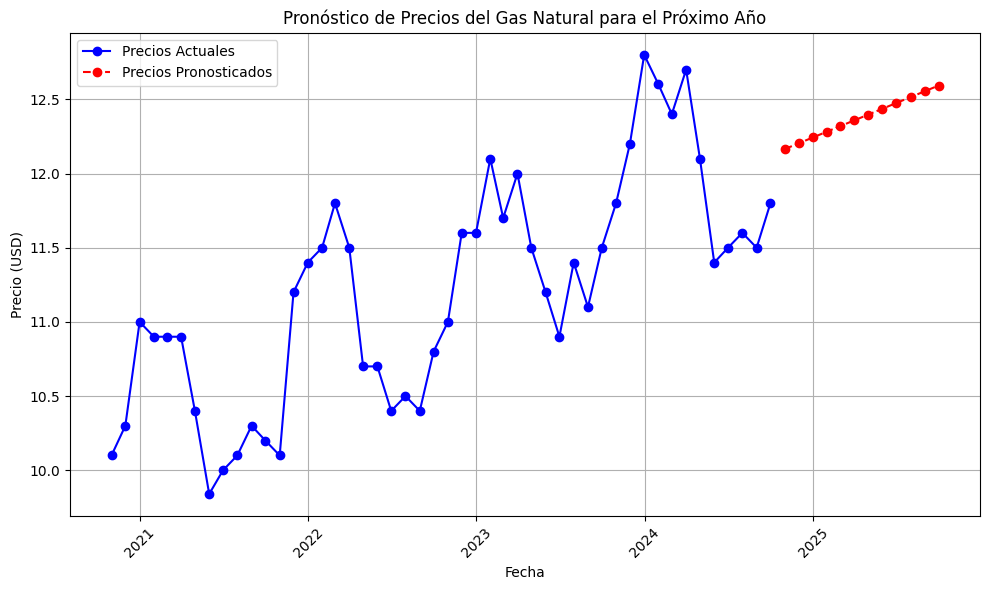

In [33]:
# Graficar los datos originales y los datos pronosticados
plt.figure(figsize=(10, 6))
plt.plot(nat_gas_data['Dates'], nat_gas_data['Prices'], marker='o', linestyle='-', color='b', label='Precios Actuales')
plt.plot(future_data['Dates'], future_data['Prices'], marker='o', linestyle='--', color='r', label='Precios Pronosticados')
plt.title('Pronóstico de Precios del Gas Natural para el Próximo Año')
plt.xlabel('DATE')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
